## Importing Necessary Modules

In [68]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the K-means algorithm
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



In [1]:
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

# Move the uploaded file to the .kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import kaggle
import pandas as pd

# Load the Kaggle dataset (example: titanic dataset)
#dataset = kaggle.api.dataset_download_files('geoffp98/skin-cancer-mnist-ham10000', path='.', unzip=True)
dataset = kaggle.api.dataset_download_files('geoffp98/skin-cancer-mnist-ham10000', path='.')

# Load the data file directly into a DataFrame without explicitly reading it from disk
data = pd.read_csv('/content/HAM10000_metadata.csv')  # Update with the actual file name and format

# Now 'data' contains the dataset ready for analysis without being explicitly downloaded to your local machine

## Need to install imblanced-learn to overcome the oversampling - but not successful

In [ ]:
# !pip install imbalanced-learn
# !pip install --upgrade scikit-learn imbalanced-learn
# !pip install scikit-learn
# from imblearn.over_sampling import RandomOverSampler
# !pip show scikit-learn imbalanced-learn
# !pip install --upgrade joblib numpy scipy threadpoolctl
# !pip install numpy
# !pip install threadpoolctl

## Read csv file

In [9]:
# Read in the CSV file as a Pandas DataFrame
skin_metadata_df = pd.read_csv(
    Path("Resources/HAM10000_metadata.csv")
)

# Review the DataFrame
skin_metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [46]:
skin_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [47]:
skin_metadata_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [49]:
skin_metadata_df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [50]:
skin_metadata_df['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

In [21]:
skin_metadata_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [55]:
skin_metadata_df_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

skin_metadata_df['diagnosis'] = skin_metadata_df['dx'].map(skin_metadata_df_dict.get) 

In [56]:
skin_metadata_df['diagnosis'].value_counts()

diagnosis
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [57]:
skin_metadata_df['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [58]:
skin_metadata_df['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

In [59]:
skin_metadata_df['age'].value_counts()

age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: count, dtype: int64

## There were missing values in age column and the following is done to fill the column using mean

In [63]:
imputer = SimpleImputer(missing_values= np.nan,strategy='mean')  
Car_impute = imputer.fit(skin_metadata_df[['age']])
skin_metadata_df['age'] = Car_impute.transform(skin_metadata_df[['age']]).ravel()

In [64]:
skin_metadata_df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
diagnosis       0
dtype: int64

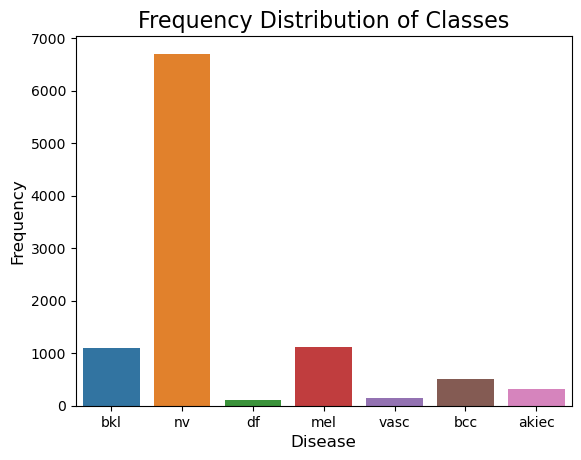

In [24]:
sns.countplot(x = 'dx', data = skin_metadata_df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

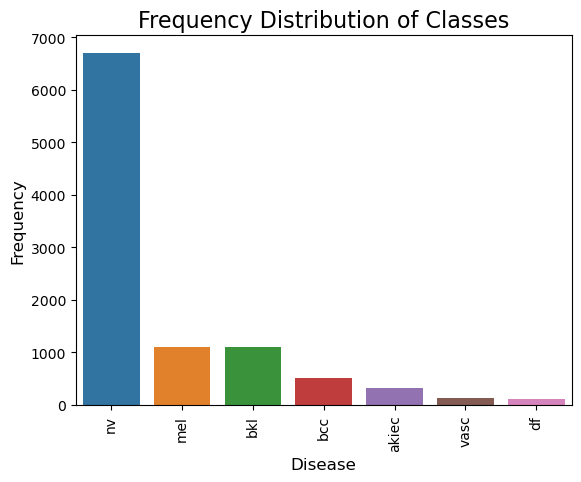

In [115]:
# Calculate the frequency of each category in 'dx'
category_counts = skin_metadata_df['dx'].value_counts()

# Get the categories sorted by frequency in descending order
sorted_categories = category_counts.index.tolist()

# Create the countplot with the sorted order
sns.countplot(x='dx', data=skin_metadata_df, order=sorted_categories)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.show()

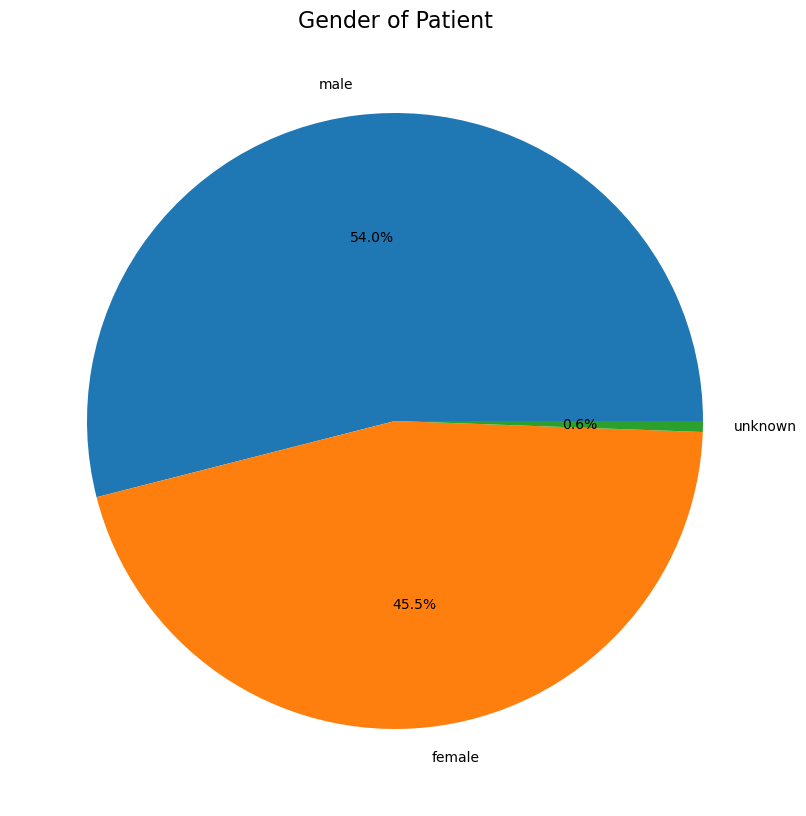

In [26]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(skin_metadata_df['sex'].value_counts(), labels = skin_metadata_df['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

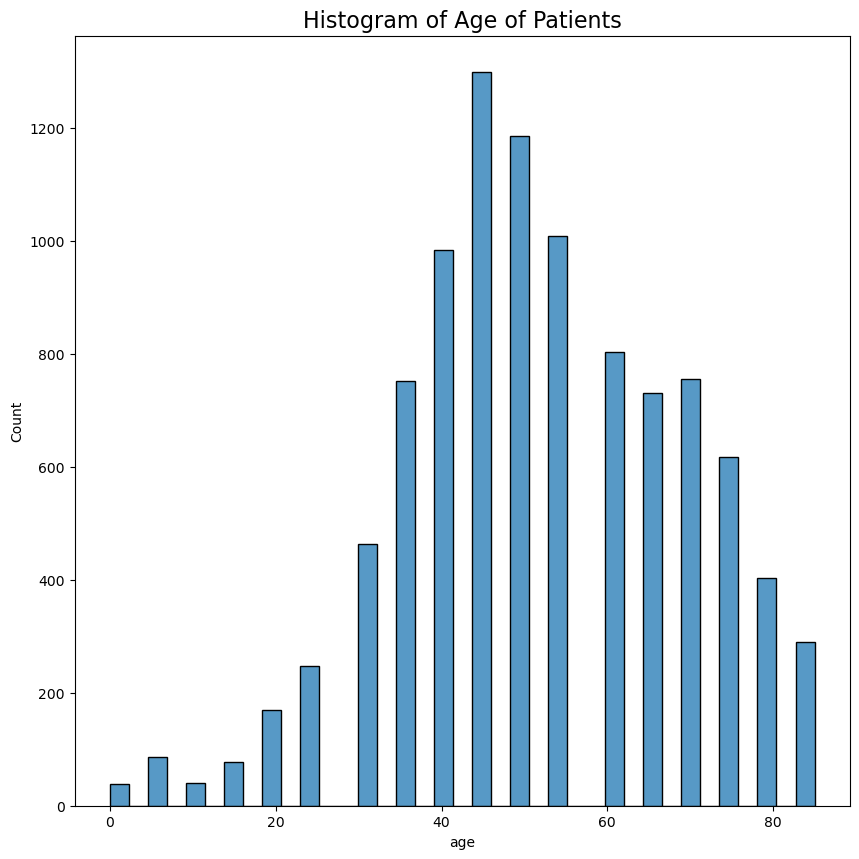

In [27]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(skin_metadata_df['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

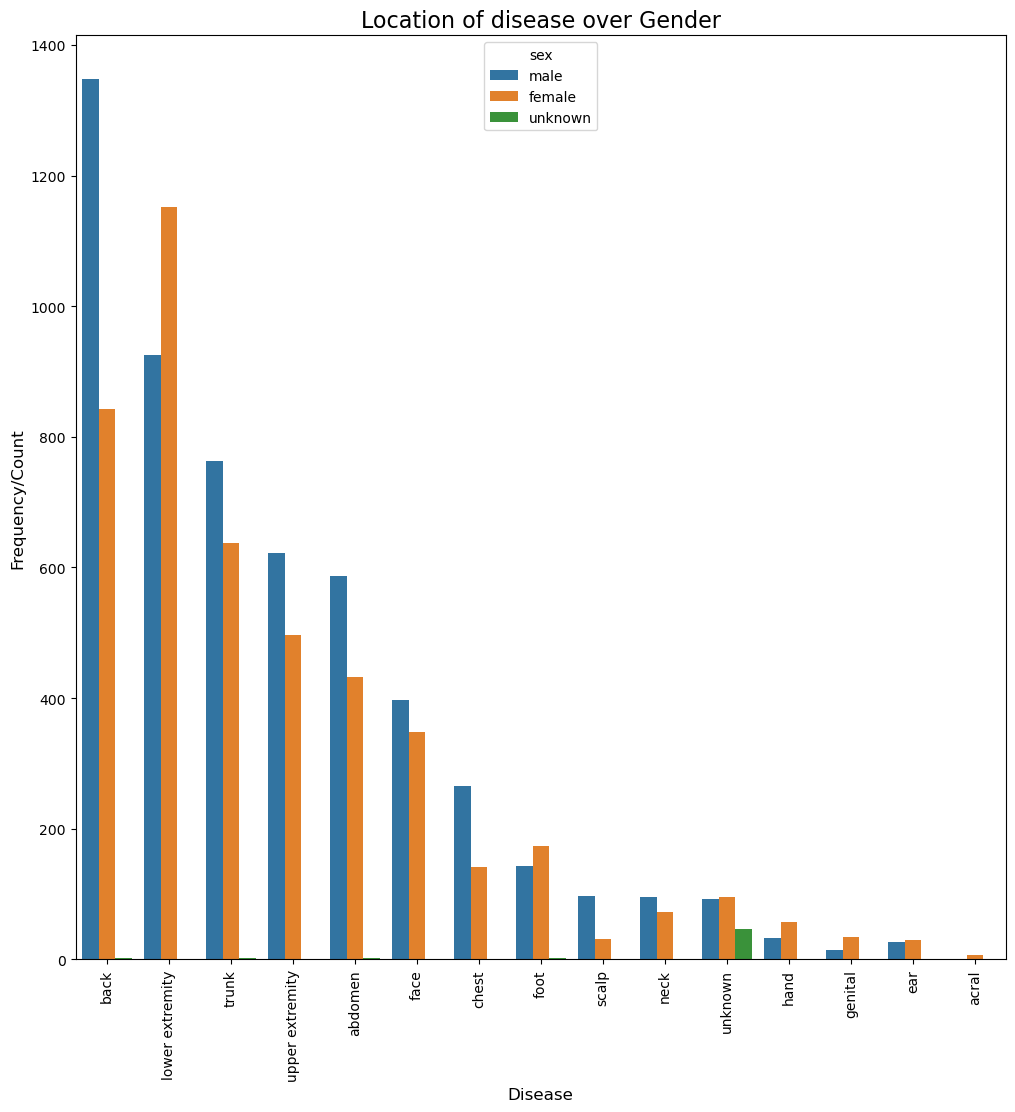

In [28]:
value = skin_metadata_df[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)
plt.show()

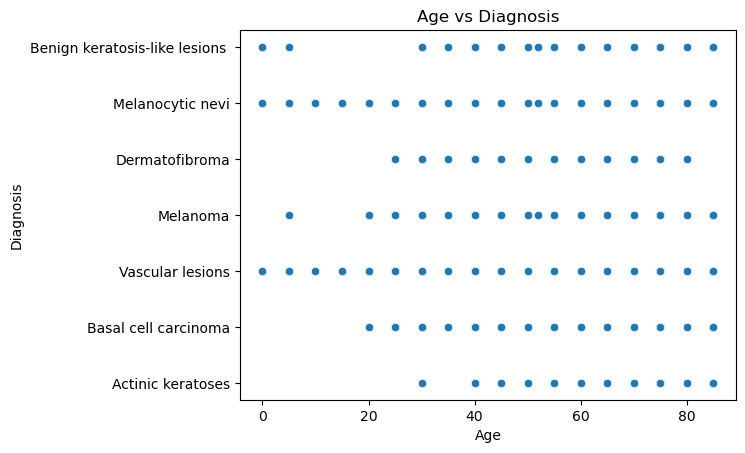

In [70]:
# Assuming 'age' and 'diagnosis' are columns in your DataFrame
sns.scatterplot(x='age', y='diagnosis', data=skin_metadata_df)
plt.title('Age vs Diagnosis')
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.show()

## Data Preparation

In [71]:
from sklearn import preprocessing

In [72]:
label_encoder = preprocessing.LabelEncoder()

In [73]:
df1 = skin_metadata_df.copy()

In [74]:
lesion_id_cat = label_encoder.fit_transform(df1['lesion_id'])
lesion_id_cat = pd.DataFrame({'lesion_id_cat': lesion_id_cat})

In [75]:
image_id_cat = label_encoder.fit_transform(df1['image_id'])
image_id_cat = pd.DataFrame({'image_id_cat': image_id_cat})

In [76]:
dx_cat = label_encoder.fit_transform(df1['dx'])
dx_cat = pd.DataFrame({'dx_cat': dx_cat})

In [77]:
dx_type_cat = label_encoder.fit_transform(df1['dx_type'])
dx_type_cat = pd.DataFrame({'dx_type_cat': dx_type_cat})

In [78]:
sex_cat = label_encoder.fit_transform(df1['sex'])
sex_cat = pd.DataFrame({'sex_cat': sex_cat})

In [79]:
localization_cat = label_encoder.fit_transform(df1['localization'])
localization_cat = pd.DataFrame({'localization_cat': localization_cat})

In [80]:
diagnosis_cat = label_encoder.fit_transform(df1['diagnosis'])
diagnosis_cat = pd.DataFrame({'diagnosis_cat': diagnosis_cat})

In [81]:
df1.lesion_id = lesion_id_cat
df1.image_id = image_id_cat
df1.dx = dx_cat
df1.dx_type = dx_type_cat
df1.sex = sex_cat
df1.localization = localization_cat
df1.diagnosis = diagnosis_cat

In [82]:
df1

,lesion_id,image_id,dx,dx_type,age,sex,localization,diagnosis
0,118,3113,2,3,80.0,1,11,2
1,118,724,2,3,80.0,1,11,2
2,2710,2463,2,3,80.0,1,11,2
3,2710,1355,2,3,80.0,1,11,2
4,1460,7327,2,3,75.0,1,4,2
...,...,...,...,...,...,...,...,...
10010,2844,8778,0,3,40.0,1,0,0
10011,2844,9244,0,3,40.0,1,0,0
10012,2844,9230,0,3,40.0,1,0,0
10013,239,8548,0,3,80.0,1,5,0


## Normalisation

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaled_features = df1.copy()

In [85]:
col_names = ['lesion_id', 'image_id' , 'dx', 'dx_type', 'age', 'sex', 'localization', 'diagnosis']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [86]:
scaled_features[col_names] = features
scaled_features

,lesion_id,image_id,dx,dx_type,age,sex,localization,diagnosis
0,-1.680017,-0.655118,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
1,-1.680017,-1.481453,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
2,-0.474447,-0.879948,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
3,-0.474447,-1.263195,-1.496108,0.835507,1.662953,0.882321,0.847871,-1.343453
4,-1.055837,0.802468,-1.496108,0.835507,1.367434,0.882321,-0.626664,-1.343453
...,...,...,...,...,...,...,...,...
10010,-0.412122,1.304356,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10011,-0.412122,1.465542,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10012,-0.412122,1.460699,-2.867221,0.835507,-0.701196,0.882321,-1.469256,-2.997989
10013,-1.623738,1.224801,-2.867221,0.835507,1.662953,0.882321,-0.416016,-2.997989


In [87]:
X = scaled_features.drop(columns=['diagnosis'],axis=1)

## Prediction

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
y = skin_metadata_df.dx

In [93]:
y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in skin_metadata_df.dx]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

## SVM

In [95]:
from sklearn.svm import SVC

In [96]:
model_svc = SVC()

In [97]:
model_svc.fit(X_train, y_train)

SVC()

In [98]:
model_svc.score(X_train,y_train)

0.9811532700948578

In [99]:
model_svc.score(X_test,y_test)

0.9675486769845232

In [100]:
y_predict = model_svc.predict(X_test)

In [101]:
from sklearn.metrics import classification_report , confusion_matrix

In [102]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,1567,25
is_healthy,40,371


<Axes: >

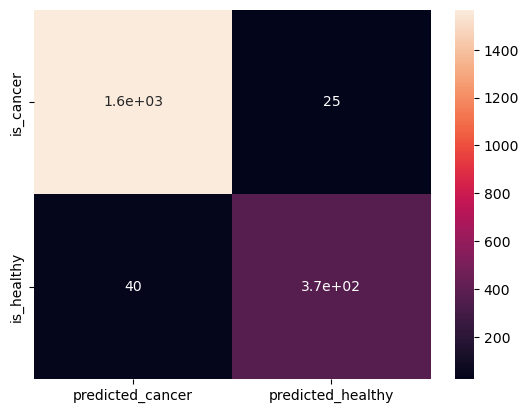

In [103]:
sns.heatmap(confusion, annot=True)

In [104]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       411
           1       0.98      0.98      0.98      1592

    accuracy                           0.97      2003
   macro avg       0.96      0.94      0.95      2003
weighted avg       0.97      0.97      0.97      2003



## Multi-labels classification

In [105]:
y = df1['diagnosis']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [107]:
model_svc.fit(X_train, y_train)

SVC()

In [108]:
model_svc.score(X_train,y_train)

0.9998751872191712

In [109]:
model_svc.score(X_test,y_test)

1.0

In [110]:
y_predict = model_svc.predict(X_test)

In [111]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00      1327
           5       1.00      1.00      1.00       222
           6       1.00      1.00      1.00        32

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003



In [112]:
import itertools

In [113]:
def confusion_mat (cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

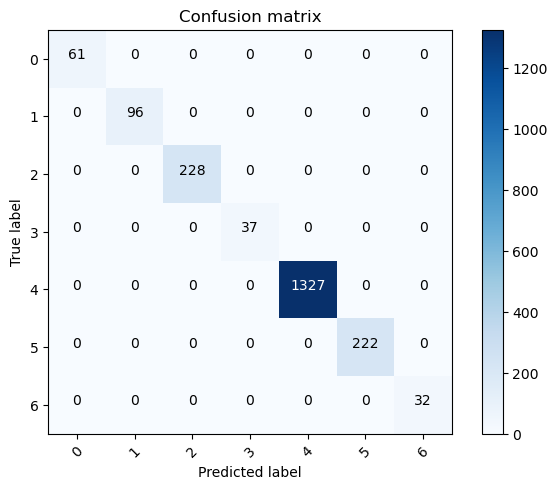

In [114]:
confusion_mat(confusion_matrix(y_test, y_predict), classes = range(7)) 

## Read 2nd csv file

In [51]:
# Read in the CSV file as a Pandas DataFrame
cancer_df = pd.read_csv(
    Path("Resources/hmnist_28_28_RGB.csv")
)

# Review the DataFrame
cancer_df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [52]:
y = cancer_df['label']
x = cancer_df.drop(columns = ['label'])

In [53]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}